<a href="https://colab.research.google.com/github/Soumiak/RANDOM-FOREST/blob/main/TREES_AND_RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from six import StringIO
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


In [2]:
data = pd.read_csv("data_titanic.csv" , sep=",")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.corr()
#the correlation matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


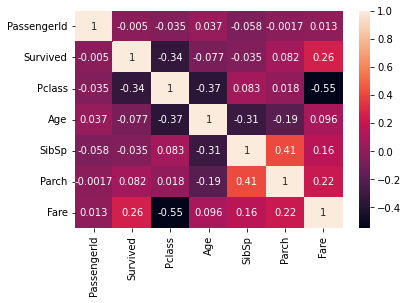

In [4]:
import seaborn as sns
sns.heatmap( data.corr() , annot=True)
#Heatmap

In [5]:
data['Pclass'].fillna(data['Pclass'].mode() , inplace=True)

In [7]:
data['Age'].isnull().sum()
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Cabin'].isnull().sum()

687

In [ ]:
nbrE=len(df['Cabin'])
print("number of elements is=" , nbrE)
print( df['Cabin'].value_counts() )
data['Cabin'].fillna('G6' , inplace=True)

number of elements is= 891
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


In [8]:
data['Embarked'].fillna('C' , inplace=True)

In [9]:
sexD={'male' : 1 ,'female' : 0}
data['Sex'].replace(sexD,inplace=True)
SurviveD={'Yes' : 1 , 'No' :0 }
data['Survived'].replace(SurviveD , inplace=True)
EmbarkedD={'S':0 , 'C':1 , 'Q':2}
data['Embarked'].replace(EmbarkedD , inplace=True)

In [11]:
def THECHILDREN(prsn):
  (age , sex) = prsn
  if age<16:
    return 2
  else:
      return sex

data['Person']=data[['Age','Sex']].apply(THECHILDREN , axis=1)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1.0


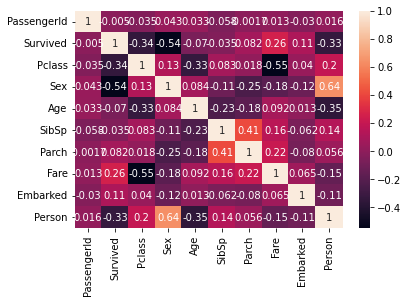

In [14]:
import seaborn as sns
sns.heatmap( data.corr() , annot=True)

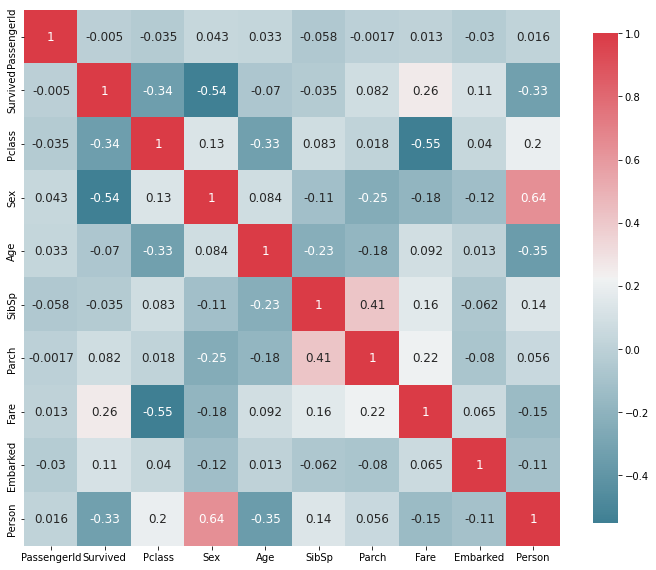

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_correlation_map( df ):
    corr = data.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(data)

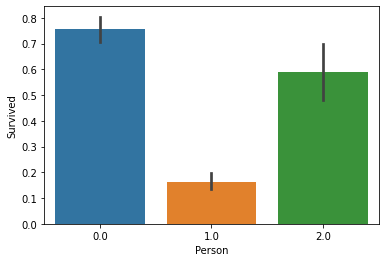

In [18]:
sns.barplot(x='Person' , y='Survived' , data=data)

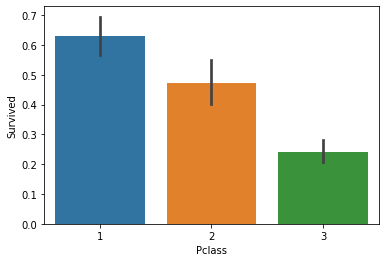

In [20]:
sns.barplot(x='Pclass' , y='Survived' , data=data)

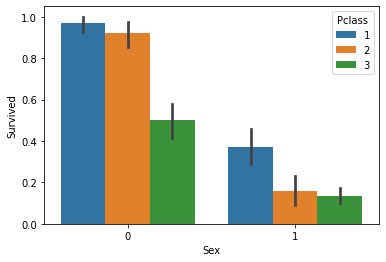

In [21]:
sns.barplot(x='Sex', y='Survived' , hue='Pclass' , data=data)

In [22]:
data.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [23]:
def TITLE(N):
  S = N.split(',')
  T=S[1].split('.')
  return T[0]

data['Title']=data['Name'].apply(TITLE )

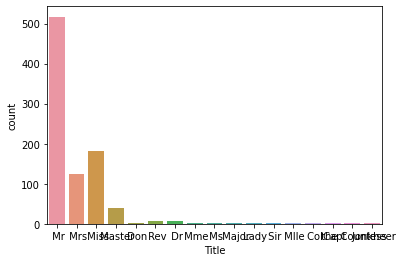

In [24]:
sns.countplot(x='Title' , data=data)

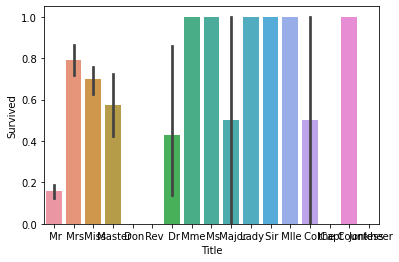

In [25]:
sns.barplot(x='Title' , y='Survived' , data=data)

Apply decision tree :

In [26]:
from sklearn.model_selection import train_test_split
x=data[['Sex','Pclass','Age']]
y=data['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy : ', accuracy_score(y_test,y_pred))
print('f1 score : ', f1_score(y_test,y_pred))
print('precision_score : ', precision_score(y_test,y_pred))

Accuracy :  0.776536312849162
f1 score :  0.6923076923076923
precision_score :  0.7894736842105263


 Plot your decision tree :

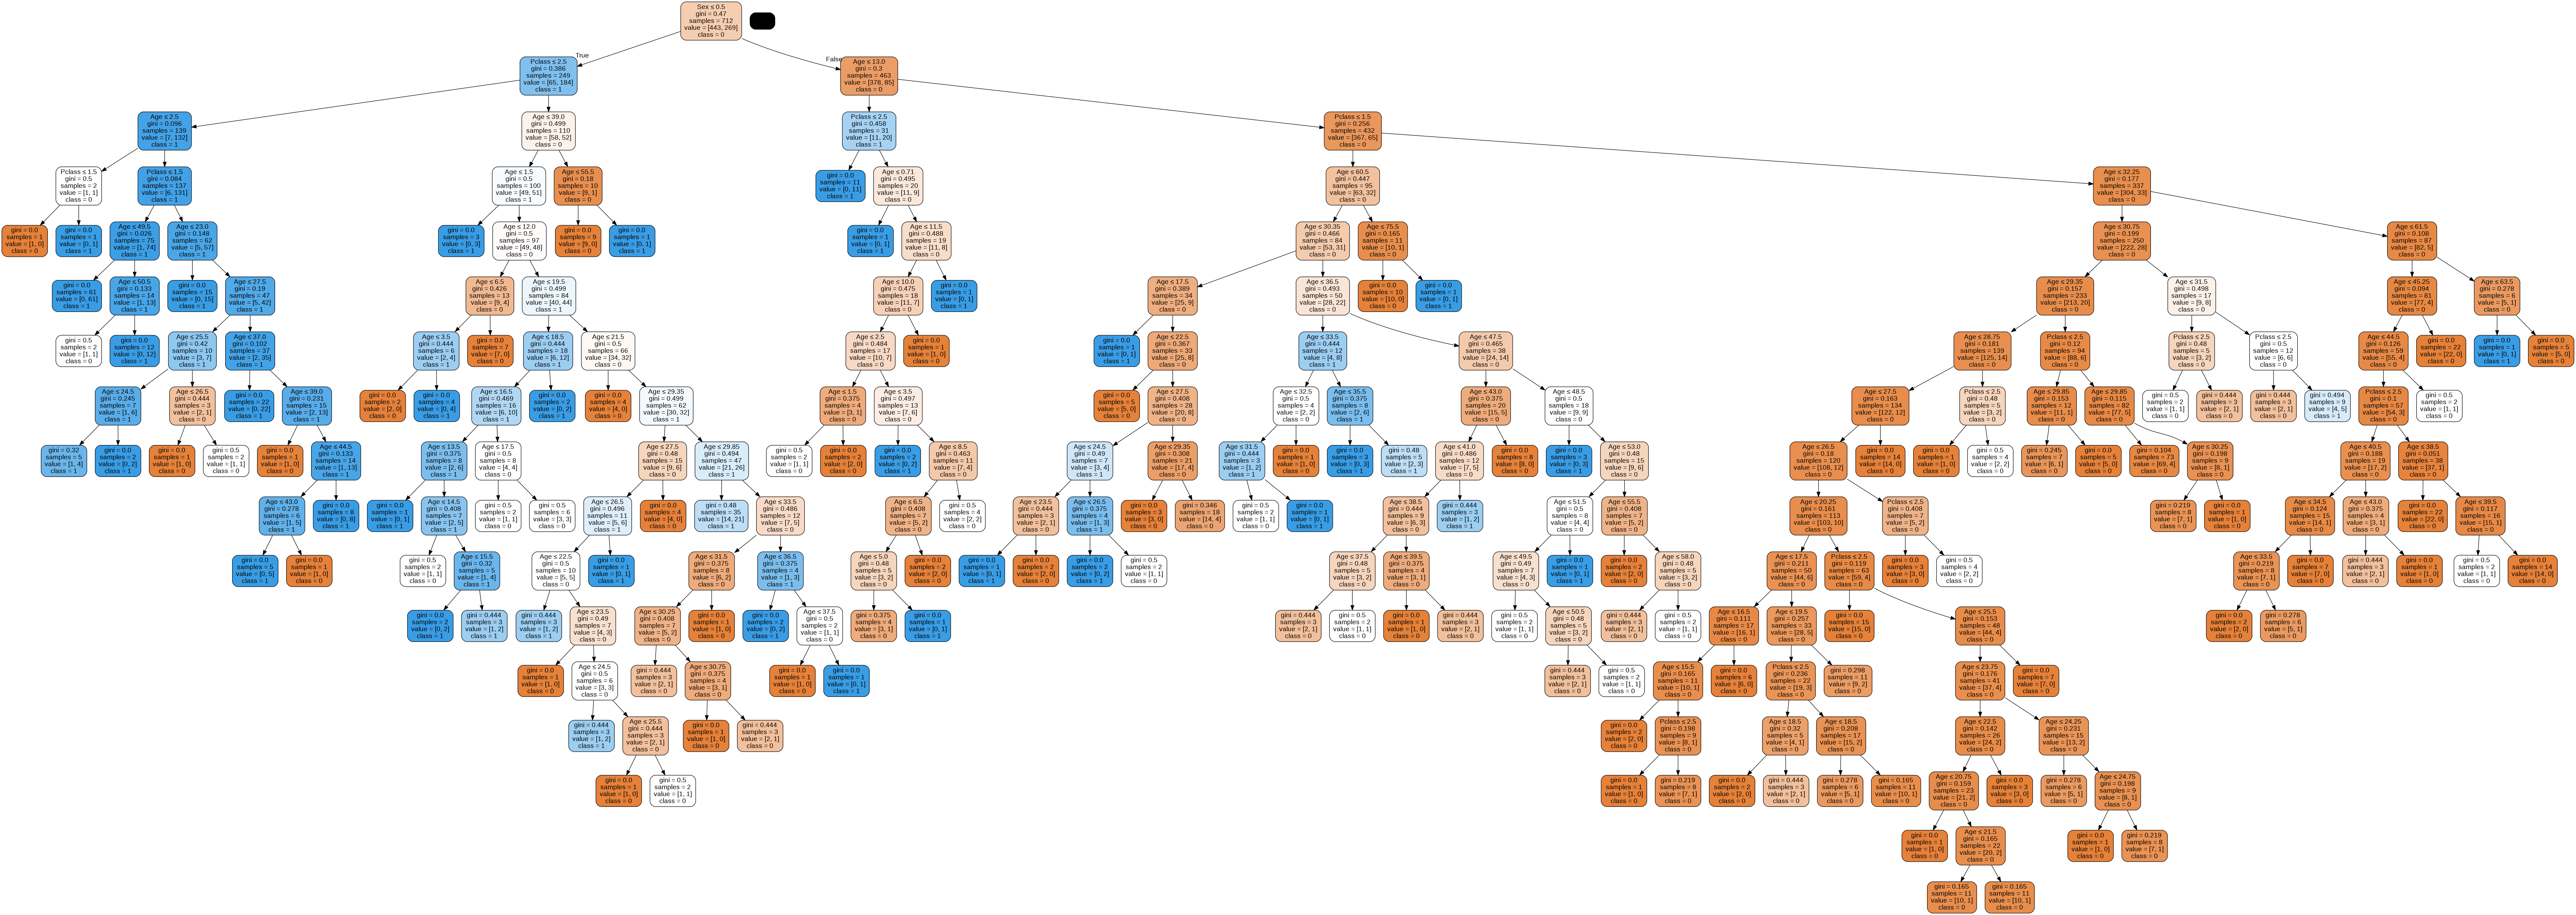

In [37]:


dot_data = StringIO()
feature_cols = ['Sex' ,'Pclass','Age']
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

Change the decision tree parameters :

In [38]:
model = DecisionTreeClassifier(criterion="entropy", splitter="random")
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [39]:
print('Accuracy : ', accuracy_score(y_test,y_pred))
print('f1_score : ', f1_score(y_test,y_pred))
print('precision_score : ', precision_score(y_test,y_pred))

Accuracy :  0.776536312849162
f1_score :  0.6923076923076923
precision_score :  0.7894736842105263


In [ ]:
we notice that the results we got after changing two parameters of the dicision tree are slightly smaller than the first results

RANDOM FOREST

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  

x=data[['Sex','Pclass','Age']]
y=data['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('f1 score : ', metrics.f1_score(y_test,y_pred))
print('precision_score : ', metrics.precision_score(y_test,y_pred))

Accuracy: 0.776536312849162
f1 score :  0.7222222222222221
precision_score :  0.7323943661971831
